In [1]:
# import classy module
import matplotlib.pyplot as plt
import pandas as pd
from classy import Class

# LCDM

In [2]:
def lcdm_background():
    # create instance of the class "Class"
    Lambda_cdm = Class()
    # pass input parameters
    Lambda_cdm.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842,'Omega_fld':0.,'Omega_scf':0.,'Omega_tf':0.})
    #Lambda_CDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
    # run class
    Lambda_cdm.compute()
    return pd.DataFrame(Lambda_cdm.get_background())

# 2F-CDM

In [3]:
def two_form(l,mu):
    # create instance of the class "Class"
    two_form1 = Class()
    # pass input parameters
    two_form1.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842,'Omega_fld':0.,'Omega_scf':0.,'Omega_tf':1.,'tf_parameters_1':l,'tf_parameters_2':mu,'tf_parameters_3':1.0})
    #LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
    # run class
    two_form1.compute()
    return pd.DataFrame(two_form1.get_background())
    

In [4]:
z = two_form(0.17,1.e-15)['z']

Omega_r   = (two_form(0.17,1.e-15)['(.)rho_g']+two_form(0.17,1.e-15)['(.)rho_ur']) /two_form(0.17,1.e-15)['H [1/Mpc]']/two_form(0.17,1.e-15)['H [1/Mpc]']
Omega_b   = (two_form(0.17,1.e-15)['(.)rho_b'])/two_form(0.17,1.e-15)['H [1/Mpc]']/two_form(0.17,1.e-15)['H [1/Mpc]']
Omega_cdm = (two_form(0.17,1.e-15)['(.)rho_cdm'])/two_form(0.17,1.e-15)['H [1/Mpc]']/two_form(0.17,1.e-15)['H [1/Mpc]']
Omega_DE  = (two_form(0.17,1.e-15)['(.)rho_tf'])/two_form(0.17,1.e-15)['H [1/Mpc]']/two_form(0.17,1.e-15)['H [1/Mpc]']
w_DE      = (two_form(0.17,1.e-15)['(.)p_tf'])/two_form(0.17,1.e-15)['(.)rho_tf']


x    = two_form(0.17,1.e-15)['x_tf']
z_tf = (two_form(0.17,1.e-15)['z_tf'])/two_form(0.17,1.e-15)['H [1/Mpc]']
v    = (two_form(0.17,1.e-15)['v_tf'])/two_form(0.17,1.e-15)['H [1/Mpc]']

def Sigma(l,mu):
  return two_form(l,mu)['sigma_tf']/two_form(l,mu)['H [1/Mpc]']

q = (1. -z_tf**2 -3*v**2 -8.*(0.17*v**2 - 1.e-15*Omega_cdm)*x**2 + Omega_r + 3*Sigma(0.17,1.e-15**2 ))/2.
w_eff = -1. + 2.*(1+q)*1/(1-Sigma(0.17,1.e-15)**2 )/3 - 2.*Sigma(0.17,1.e-15)**2/(1-Sigma(0.17,1.e-15)**2)



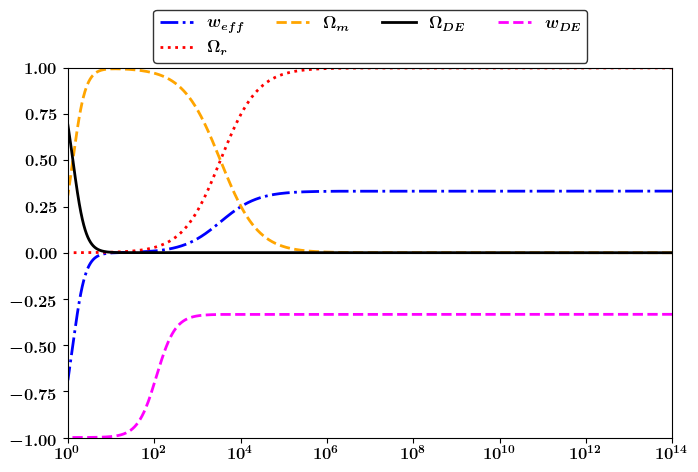

In [5]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage{amsmath} \boldmath') 


fig, axs = plt.subplots()  

axs.semilogx(1+z, w_eff,              color = "blue",     ls = '-.',  label = r'$w_{eff}$',    linewidth=2)
axs.semilogx(1+z, Omega_r,            color = "red",      ls = ':',   label = r'$\Omega_{r}$', linewidth=2)
axs.semilogx(1+z, Omega_b+Omega_cdm,  color = "orange",   ls = '--',  label = r'$\Omega_{m}$', linewidth=2)
axs.semilogx(1+z, Omega_DE,           color = "black",    ls = '-',   label = r'$\Omega_{DE}$',linewidth=2)
axs.semilogx(1+z, w_DE,               color = "magenta",  ls = '--',  label = r'$w_{DE}$',     linewidth=2)

axs.legend(loc = 'upper center', bbox_to_anchor = (0.25, 1.18, 0.5, 0.0), ncol = 4, bbox_transform = axs.transAxes,fontsize = 'large', edgecolor = 'black', borderpad = 0.4) 
axs.set_xlim(1,1E14) 
axs.set_ylim(-1,1)
axs.xaxis.set_tick_params(labelsize='large')                   
axs.yaxis.set_tick_params(labelsize='large')  

fig.set_figwidth(7.8)
fig.set_figheight(4.8)                                          

plt.show()


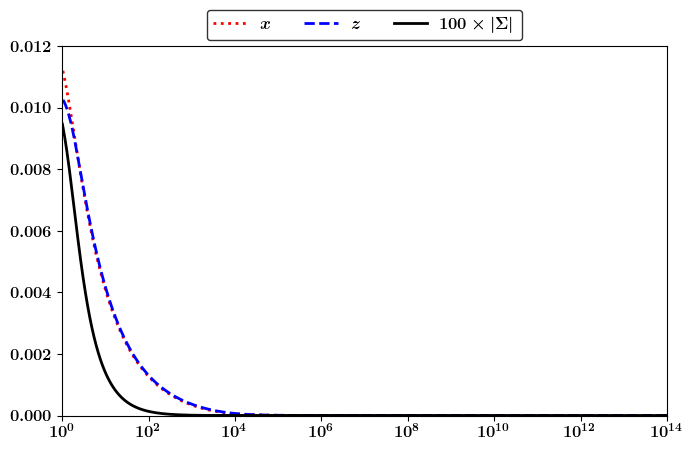

In [6]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage{amsmath} \boldmath') 
#--- Hubble parameter ---
fig, axs = plt.subplots()  

axs.semilogx(1+z, x,     color = "red", ls = ':',  label = r'$x$',  linewidth=2)
axs.semilogx(1+z, z_tf,  color = "blue",   ls = '--', label = r'$z$',  linewidth=2)
axs.semilogx(1+z,100*abs(Sigma(0.17,1.e-15)), color = "black",  ls = '-',  label = r'$100\times|\Sigma|$',   linewidth=2)

axs.legend(loc = 'upper center', bbox_to_anchor = (0.25, 1.12, 0.5, 0.0), ncol = 4, bbox_transform = axs.transAxes,fontsize = 'large', edgecolor = 'black', borderpad = 0.4) 
axs.set_xlim(1,1E14) 
axs.set_ylim(0,0.012)
axs.xaxis.set_tick_params(labelsize='large')                   
axs.yaxis.set_tick_params(labelsize='large')  

fig.set_figheight(4.8)                                          
fig.set_figwidth(7.8)

plt.show()

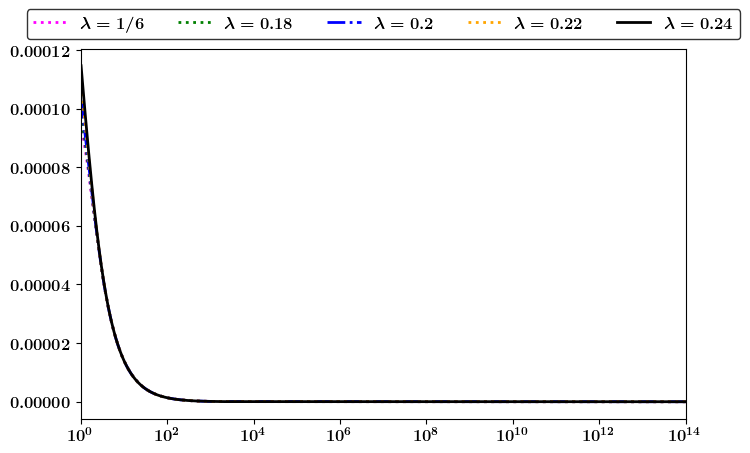

In [7]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage{amsmath} \boldmath') 




#--- Hubble parameter ---
fig, axs = plt.subplots()                                                                    
axs.semilogx(1+z, abs(Sigma(1/6,1.e-15)),  color = "magenta", ls = ':',  label = r'$\lambda = 1/6$',  linewidth=2)
axs.semilogx(1+z, abs(Sigma(0.18,1.e-15)), color = "green",   ls = ':',  label = r'$\lambda = 0.18$', linewidth=2)
axs.semilogx(1+z, abs(Sigma(0.2,1.e-15)),  color = "blue",    ls = '-.', label = r'$\lambda = 0.2$',  linewidth=2)
axs.semilogx(1+z, abs(Sigma(0.22,1.e-15)), color = "orange",  ls = ':',  label = r'$\lambda = 0.22$', linewidth=2)
axs.semilogx(1+z, abs(Sigma(0.24,1.e-15)), color = "black",   ls = '-',  label = r'$\lambda = 0.24$', linewidth=2)

axs.legend(loc = 'upper center', bbox_to_anchor = (0.25, 1.13, 0.5, 0.0), ncol = 5, bbox_transform = axs.transAxes,fontsize = 'large', edgecolor = 'black', borderpad = 0.4) 

axs.set_xlim(1,1E14) 
#axs.set_ylim(-1,1)

axs.xaxis.set_tick_params(labelsize='large')                   
axs.yaxis.set_tick_params(labelsize='large')  

fig.set_figheight(4.8)                                          
fig.set_figwidth(7.8) 

plt.show()


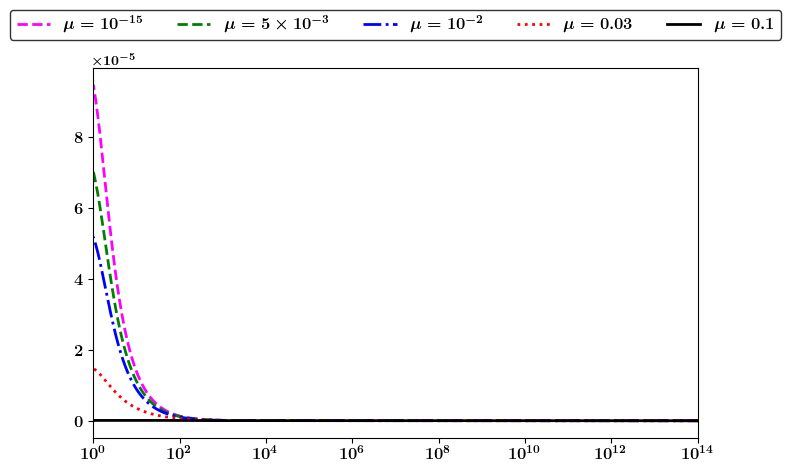

In [8]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage{amsmath} \boldmath') 


#--- Hubble parameter ---
fig, axs = plt.subplots()                                                                    
axs.semilogx(1+z, abs(Sigma(0.17,1.e-15)),  color = "magenta", ls = '--',  label = r'$\mu = 10^{-15}$',  linewidth=2)
axs.semilogx(1+z, abs(Sigma(0.17,5*1.e-3)), color = "green",   ls = '--',  label = r'$\mu = 5\times 10^{-3}$', linewidth=2)
axs.semilogx(1+z, abs(Sigma(0.17,1.e-2)),   color = "blue",    ls = '-.',  label = r'$\mu = 10^{-2}$',  linewidth=2)
axs.semilogx(1+z, abs(Sigma(0.17,0.03)),    color = "red",     ls = ':',   label = r'$\mu = 0.03$', linewidth=2)
axs.semilogx(1+z, abs(Sigma(0.17,0.1)),     color = "black",   ls = '-',   label = r'$\mu = 0.1$', linewidth=2)

axs.legend(loc = 'upper center', bbox_to_anchor = (0.25, 1.18, 0.5, 0.0), ncol = 5, bbox_transform = axs.transAxes,fontsize = 'large', edgecolor = 'black', borderpad = 0.4) 

axs.set_xlim(1,1E14) 
#axs.set_ylim(-1,1)

axs.xaxis.set_tick_params(labelsize='large')                   
axs.yaxis.set_tick_params(labelsize='large')  

fig.set_figheight(4.8)                                          
fig.set_figwidth(7.8) 

plt.show()

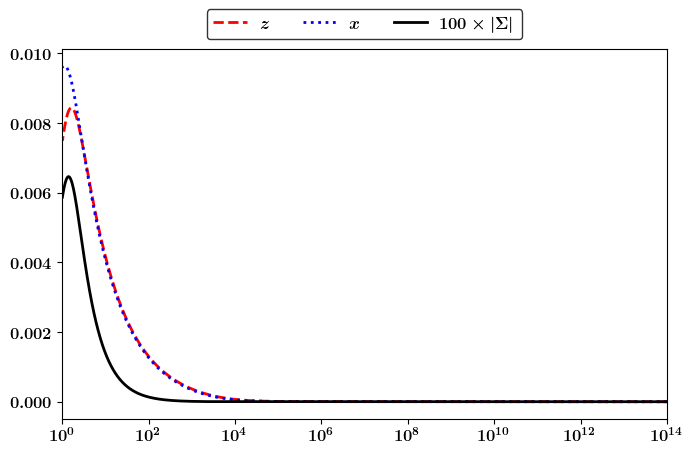

In [9]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage{amsmath} \boldmath') 




#--- Hubble parameter ---
fig, axs = plt.subplots()                                                                    

axs.semilogx(1 + two_form(0.01,1.e-15)['z'], two_form(0.01,1.e-15)['z_tf']/two_form(0.01,1.e-15)['H [1/Mpc]'],  color = "red",   ls = '--',  label = r'$z$', linewidth=2)
axs.semilogx(1 + two_form(0.01,1.e-15)['z'], two_form(0.01,1.e-15)['x_tf'],  color = "blue", ls = ':',  label = r'$x$',  linewidth=2)
axs.semilogx(1 + two_form(0.01,1.e-15)['z'], 100*abs(two_form(0.01,1.e-15)['sigma_tf'])/two_form(0.01,1.e-15)['H [1/Mpc]'],  color = "black",   ls = '-',  label = r'$100\times|\Sigma|$', linewidth=2)

axs.legend(loc = 'upper center', bbox_to_anchor = (0.25, 1.13, 0.5, 0.0), ncol = 4, bbox_transform = axs.transAxes,fontsize = 'large', edgecolor = 'black', borderpad = 0.4) 

axs.set_xlim(1,1E14) 
#axs.set_ylim(-1,1)

axs.xaxis.set_tick_params(labelsize='large')                   
axs.yaxis.set_tick_params(labelsize='large')  

fig.set_figheight(4.8)                                          
fig.set_figwidth(7.8) 

plt.show()



In [9]:
data = pd.DataFrame(two_form(0.17,0))

In [10]:
data

,z,proper time [Gyr],conf. time [Mpc],H [1/Mpc],comov. dist.,ang.diam.dist.,lum. dist.,comov.snd.hrz.,(.)rho_g,(.)rho_b,...,(.)p_tf,x_tf,z_tf,v_tf,sigma_tf,(.)rho_tot,(.)p_tot,(.)p_tot_prime,gr.fac. D,gr.fac. f
0,1.000000e+14,7.559519e-26,4.634785e-09,2.157256e+22,14151.722990,1.415172e-10,1.415172e+18,2.676317e-09,2.751561e+44,2.490422e+33,...,-9.171868e+15,1.000000e-14,1.658783e+08,0.000188,0.000000e+00,4.653755e+44,1.551252e+44,-1.338579e+53,0.000005,2.000000
1,9.991944e+13,7.571713e-26,4.638423e-09,2.153782e+22,14151.722990,1.416313e-10,1.414032e+18,2.678475e-09,2.742705e+44,2.484408e+33,...,-9.157097e+15,9.999068e-15,1.657447e+08,0.000188,-2.053416e-09,4.638777e+44,1.546259e+44,-1.333196e+53,0.000005,1.996781
2,9.983894e+13,7.583927e-26,4.643880e-09,2.150313e+22,14151.722990,1.417455e-10,1.412893e+18,2.680635e-09,2.733877e+44,2.478409e+33,...,-9.142349e+15,9.998150e-15,1.656111e+08,0.000188,-4.101874e-09,4.623847e+44,1.541282e+44,-1.327834e+53,0.000005,1.993573
3,9.975851e+13,7.596161e-26,4.647518e-09,2.146850e+22,14151.722990,1.418598e-10,1.411755e+18,2.682796e-09,2.725078e+44,2.472424e+33,...,-9.127624e+15,9.997245e-15,1.654777e+08,0.000188,-6.145385e-09,4.608965e+44,1.536322e+44,-1.322494e+53,0.000005,1.990375
4,9.967815e+13,7.608415e-26,4.651156e-09,2.143392e+22,14151.722990,1.419742e-10,1.410618e+18,2.684959e-09,2.716307e+44,2.466453e+33,...,-9.112924e+15,9.996354e-15,1.653444e+08,0.000188,-8.183961e-09,4.594131e+44,1.531377e+44,-1.317176e+53,0.000005,1.987188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,3.228901e-03,1.372393e+01,1.413746e+04,2.265303e-04,14.264460,1.421855e+01,1.431052e+01,1.222174e+03,2.787271e-12,2.514624e-09,...,-3.530142e-08,1.125667e-02,2.329627e-06,0.000188,-2.141168e-08,5.131598e-08,-3.529985e-08,-1.419282e-15,0.998315,0.524203
39996,2.420700e-03,1.373554e+01,1.414103e+04,2.264449e-04,10.696046,1.067022e+01,1.072194e+01,1.222253e+03,2.778300e-12,2.508552e-09,...,-3.530142e-08,1.125883e-02,2.328927e-06,0.000188,-2.140935e-08,5.127730e-08,-3.529985e-08,-1.415321e-15,0.998736,0.523711
39997,1.613150e-03,1.374715e+01,1.414459e+04,2.263597e-04,7.129164,7.117682e+00,7.140665e+00,1.222332e+03,2.769358e-12,2.502494e-09,...,-3.530142e-08,1.126099e-02,2.328228e-06,0.000188,-2.140703e-08,5.123872e-08,-3.529985e-08,-1.411372e-15,0.999158,0.523220
39998,8.062498e-04,1.375876e+01,1.414816e+04,2.262747e-04,3.563815,3.560944e+00,3.566688e+00,1.222411e+03,2.760445e-12,2.496451e-09,...,-3.530141e-08,1.126314e-02,2.327531e-06,0.000188,-2.140471e-08,5.120023e-08,-3.529986e-08,-1.407435e-15,0.999579,0.522728


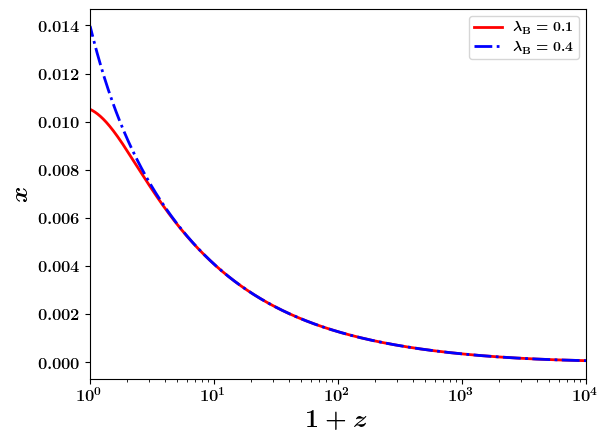

In [10]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage{amsmath} \boldmath') 
#--- Hubble parameter ---
fig, axs = plt.subplots()  

axs.semilogx(1 + two_form(0.1,1.e-5)['z'], two_form(0.1,1.e-5)['x_tf'],  color = "red",   ls = '-',   label = r'$\lambda_{\mathrm{B}}=0.1$',  linewidth=2)
#axs.loglog(1 + two_form(0.1,1.e-15)['z'], two_form(0.1,1.e-15)['x_tf'],  color = "blue",   ls = '--',    label = r'$\lambda_{\mathrm{B}}=0.1$',  linewidth=2)
#axs.loglog(1 + two_form(0.3,1.e-15)['z'], two_form(0.3,1.e-15)['x_tf'],  color = "black",   ls = ':', label = r'$\lambda_{\mathrm{B}}=0.3$',  linewidth=2)
axs.semilogx(1 + two_form(0.4,1.e-5)['z'], two_form(0.4,1.e-5)['x_tf'],  color = "blue",   ls = '-.', label = r'$\lambda_{\mathrm{B}}=0.4$',  linewidth=2)

axs.legend(loc = 'upper center', bbox_to_anchor = (0.25, 1.12, 0.5, 0.0), ncol = 4, bbox_transform = axs.transAxes,fontsize = 'large', edgecolor = 'black', borderpad = 0.4) 
axs.set_xlim(1,1E4) 
#axs.set_ylim(1E-2,1E-7)
axs.xaxis.set_tick_params(labelsize='large')                   
axs.yaxis.set_tick_params(labelsize='large')  
axs.set_xlabel(r'$1+z$',size = 18)
axs.set_ylabel(r'$x$',size = 18)

axs.legend()

#fig.set_figheight(4.8)                                          
#fig.set_figwidth(7.8)

plt.savefig('x_2f_cdm.pdf')

plt.show()

In [11]:
x    = two_form(0.17,1.e-15)['x_tf']
z_tf = (two_form(0.17,1.e-15)['z_tf'])/two_form(0.17,1.e-15)['H [1/Mpc]']
v    = (two_form(0.17,1.e-15)['v_tf'])/two_form(0.17,1.e-15)['H [1/Mpc]']

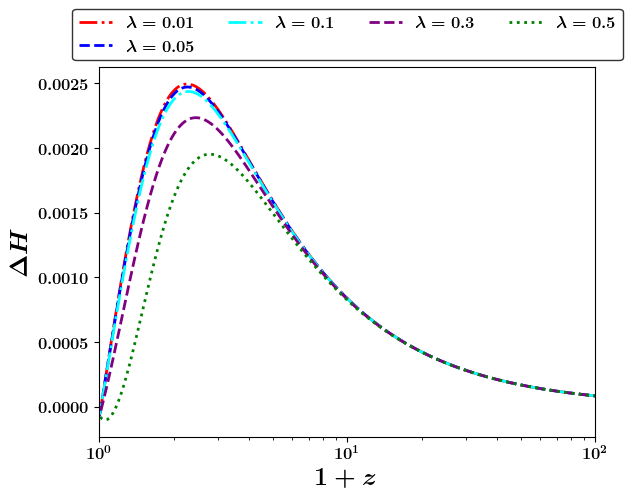

In [12]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage{amsmath} \boldmath') 


fig, axs = plt.subplots()  
axs.semilogx(1+lcdm_background()['z'], (1 - lcdm_background()['H [1/Mpc]']/two_form(0.01,0.0005)['H [1/Mpc]'])*100,   color = "Red",     ls = '-.',    label = r'$\lambda = 0.01$',     linewidth=2)
axs.semilogx(1+lcdm_background()['z'], (1 - lcdm_background()['H [1/Mpc]']/two_form(0.05,0.0005)['H [1/Mpc]'])*100,   color = "blue",    ls = '--',    label = r'$\lambda = 0.05$',    linewidth=2)
axs.semilogx(1+lcdm_background()['z'], (1 - lcdm_background()['H [1/Mpc]']/two_form(0.1,0.0005)['H [1/Mpc]'])*100,   color = "cyan",    ls = '-.',    label = r'$\lambda = 0.1$',  linewidth=2)
axs.semilogx(1+lcdm_background()['z'], (1 - lcdm_background()['H [1/Mpc]']/two_form(0.3,0.0005)['H [1/Mpc]'])*100,   color = "purple",  ls = '--',    label = r'$\lambda = 0.3$',  linewidth=2)
axs.semilogx(1+lcdm_background()['z'], (1 - lcdm_background()['H [1/Mpc]']/two_form(0.5,0.0005)['H [1/Mpc]'])*100,   color = "green",   ls = ':',     label = r'$\lambda = 0.5$',  linewidth=2)

axs.legend(loc = 'upper center', bbox_to_anchor = (0.25, 1.18, 0.5, 0.0), ncol = 4, bbox_transform = axs.transAxes,fontsize = 'large', edgecolor = 'black', borderpad = 0.4) 

axs.set_xlim(1,1E2) 
#axs.set_ylim(-1,1)

axs.set_xlabel(r'$1+z$',size = 18)
axs.set_ylabel(r'$\Delta H$',size = 18)

axs.xaxis.set_tick_params(labelsize='large')                   
axs.yaxis.set_tick_params(labelsize='large')  

#fig.set_figwidth(7.8)
#fig.set_figheight(4.8)                                          

plt.show()

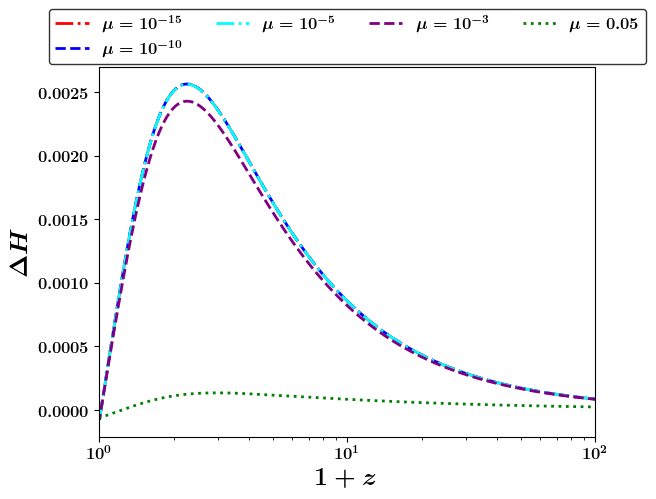

In [13]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage{amsmath} \boldmath') 


fig, axs = plt.subplots()  
axs.semilogx(1+lcdm_background()['z'], (1 - lcdm_background()['H [1/Mpc]']/two_form(0.01,1.e-15)['H [1/Mpc]'])*100,   color = "Red",     ls = '-.',    label = r'$\mu = 10^{-15}$',     linewidth=2)
axs.semilogx(1+lcdm_background()['z'], (1 - lcdm_background()['H [1/Mpc]']/two_form(0.01,1.e-10)['H [1/Mpc]'])*100,   color = "blue",    ls = '--',    label = r'$\mu = 10^{-10}$',    linewidth=2)
axs.semilogx(1+lcdm_background()['z'], (1 - lcdm_background()['H [1/Mpc]']/two_form(0.01,1.e-5)['H [1/Mpc]'])*100,   color = "cyan",    ls = '-.',    label = r'$\mu = 10^{-5}$',  linewidth=2)
axs.semilogx(1+lcdm_background()['z'], (1 - lcdm_background()['H [1/Mpc]']/two_form(0.01,1.e-3)['H [1/Mpc]'])*100,   color = "purple",  ls = '--',    label = r'$\mu = 10^{-3}$',  linewidth=2)
axs.semilogx(1+lcdm_background()['z'], (1 - lcdm_background()['H [1/Mpc]']/two_form(0.01,0.05)['H [1/Mpc]'])*100,   color = "green",   ls = ':',     label = r'$\mu = 0.05$',  linewidth=2)

axs.legend(loc = 'upper center', bbox_to_anchor = (0.25, 1.18, 0.5, 0.0), ncol = 4, bbox_transform = axs.transAxes,fontsize = 'large', edgecolor = 'black', borderpad = 0.4) 

axs.set_xlim(1,1E2) 
#axs.set_ylim(-1,1)

axs.set_xlabel(r'$1+z$',size = 18)
axs.set_ylabel(r'$\Delta H$',size = 18)

axs.xaxis.set_tick_params(labelsize='large')                   
axs.yaxis.set_tick_params(labelsize='large')  

#fig.set_figwidth(7.8)
#fig.set_figheight(4.8)                                          

plt.show()

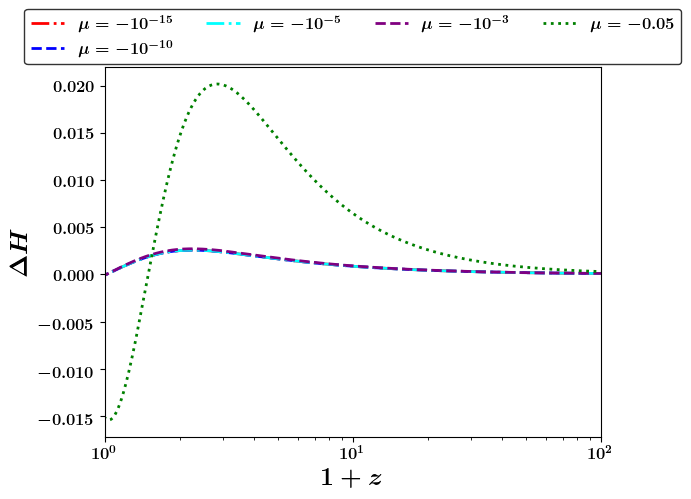

In [14]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage{amsmath} \boldmath') 


fig, axs = plt.subplots()  
axs.semilogx(1+lcdm_background()['z'], (1 - lcdm_background()['H [1/Mpc]']/two_form(0.01,-1.e-15)['H [1/Mpc]'])*100,   color = "Red",     ls = '-.',    label = r'$\mu = -10^{-15}$',     linewidth=2)
axs.semilogx(1+lcdm_background()['z'], (1 - lcdm_background()['H [1/Mpc]']/two_form(0.01,-1.e-10)['H [1/Mpc]'])*100,   color = "blue",    ls = '--',    label = r'$\mu = -10^{-10}$',    linewidth=2)
axs.semilogx(1+lcdm_background()['z'], (1 - lcdm_background()['H [1/Mpc]']/two_form(0.01,-1.e-5)['H [1/Mpc]'])*100,   color = "cyan",    ls = '-.',    label = r'$\mu = -10^{-5}$',  linewidth=2)
axs.semilogx(1+lcdm_background()['z'], (1 - lcdm_background()['H [1/Mpc]']/two_form(0.01,-1.e-3)['H [1/Mpc]'])*100,   color = "purple",  ls = '--',    label = r'$\mu = -10^{-3}$',  linewidth=2)
axs.semilogx(1+lcdm_background()['z'], (1 - lcdm_background()['H [1/Mpc]']/two_form(0.5,-0.05)['H [1/Mpc]'])*100,   color = "green",   ls = ':',     label = r'$\mu = -0.05$',  linewidth=2)

axs.legend(loc = 'upper center', bbox_to_anchor = (0.25, 1.18, 0.5, 0.0), ncol = 4, bbox_transform = axs.transAxes,fontsize = 'large', edgecolor = 'black', borderpad = 0.4) 

axs.set_xlim(1,1E2) 
#axs.set_ylim(-1,1)

axs.set_xlabel(r'$1+z$',size = 18)
axs.set_ylabel(r'$\Delta H$',size = 18)

axs.xaxis.set_tick_params(labelsize='large')                   
axs.yaxis.set_tick_params(labelsize='large')  

#fig.set_figwidth(7.8)
#fig.set_figheight(4.8)                                          

plt.show()

In [2]:
# create instance of the class "Class"
LambdaCDM = Class()
# pass input parameters
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842,'Omega_fld':0.,'Omega_scf':0.,'Omega_tf':1.,'tf_parameters_1':0.17,'tf_parameters_2':1.e-15,'tf_parameters_3':1.0})
#LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
# run class
LambdaCDM.compute()

In [3]:
LambdaCDM.get_current_derived_parameters(['sigma0_tf'])

{'sigma0_tf': -9.462144498337807e-05}

In [4]:
LambdaCDM.get_current_derived_parameters(['log_sigma0_shear'])

{'log_sigma0_shear': -inf}

In [15]:
LambdaCDM.empty()